<a href="https://colab.research.google.com/github/MJKhadeeja/ML-python-Projects/blob/K-Nearest-Neighbor/KNN(lung_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()

Saving survey lung cancer.csv to survey lung cancer.csv


{'survey lung cancer.csv': b'GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE ,ALLERGY ,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER\r\nM,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES\r\nM,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES\r\nF,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO\r\nM,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO\r\nF,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO\r\nF,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES\r\nM,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES\r\nF,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES\r\nF,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO\r\nM,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES\r\nF,61,2,2,2,2,2,2,1,2,1,2,2,2,1,YES\r\nM,72,1,1,1,1,2,2,2,2,2,2,2,1,2,YES\r\nF,60,2,1,1,1,1,2,1,1,1,1,2,1,1,NO\r\nM,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES\r\nM,69,2,1,1,1,1,1,2,2,2,2,1,1,2,NO\r\nF,48,1,2,2,2,2,2,2,2,1,2,2,2,1,YES\r\nM,75,2,1,1,1,2,1,2,2,2,2,2,1,2,YES\r\nM,57,2,2,2,2,2,1,1,1,2,1,1,2,2,YES\r\nF,68,2,2,2,2,2,2,1,1,1,2,2,1,1,YES\r\nF,61,1,1,1,1,2,2,1,1,1,1,2,1,1,NO\r\nF,44,2,2,2,2,2,2,1,1,1,1

In [ ]:
lung_data=pd.read_csv('survey lung cancer.csv')
lung_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
lung_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
lung_data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
lung_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
lung_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
lung_data.shape

(309, 16)

In [ ]:
lung_data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
#encoding gender
lung_data.replace({'GENDER':{'M':0,'F':1}},inplace=True)

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

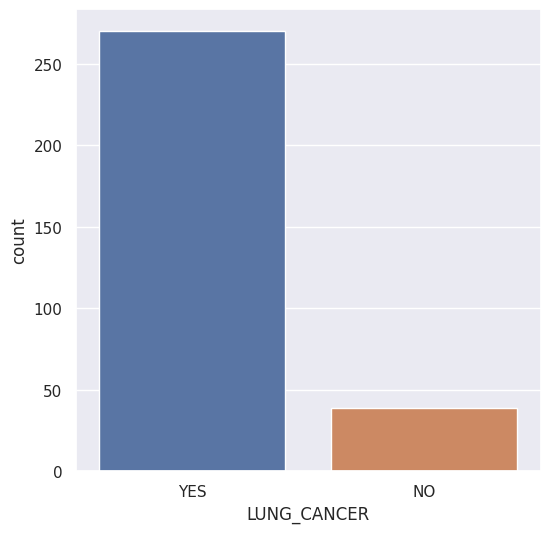

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='LUNG_CANCER',data=lung_data)


<Axes: xlabel='LUNG_CANCER', ylabel='YELLOW_FINGERS'>

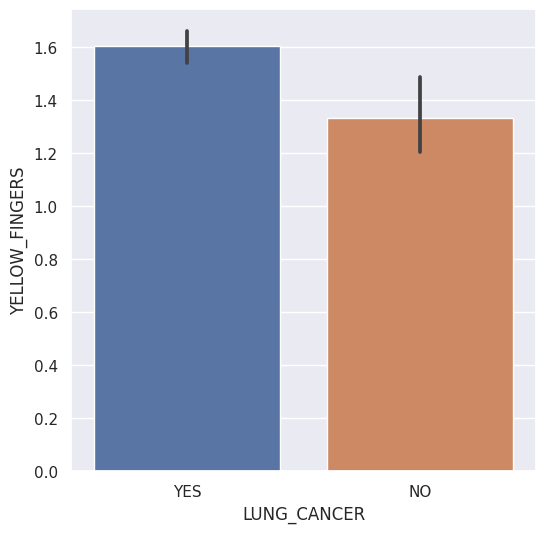

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='LUNG_CANCER',y='YELLOW_FINGERS',data=lung_data)

<Axes: xlabel='LUNG_CANCER', ylabel='ALLERGY '>

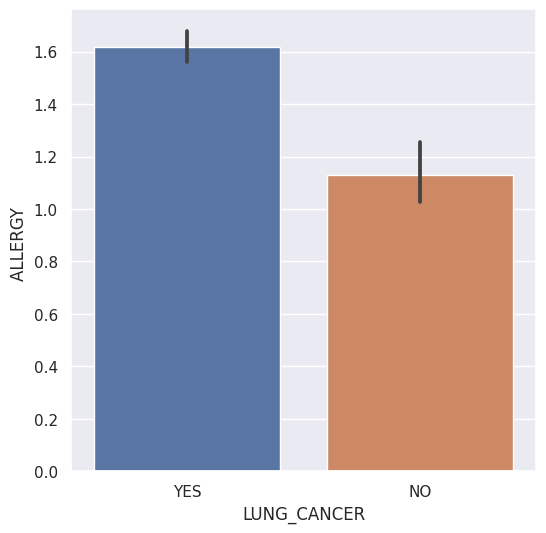

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='LUNG_CANCER',y='ALLERGY ',data=lung_data)

In [ ]:
x=lung_data.drop(columns=['LUNG_CANCER'],axis=1)
y=lung_data['LUNG_CANCER']

In [ ]:
print(x)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        1               2        2              1   
1         0   74        2               1        1              1   
2         1   59        1               1        1              2   
3         0   63        2               2        2              1   
4         1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1   56        1               1        1              2   
305       0   70        2               1        1              1   
306       0   58        2               1        1              1   
307       0   67        2               1        2              1   
308       0   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

In [ ]:
print(y)

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(309, 15) (247, 15) (62, 15)


In [ ]:
print(x_train)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
268       1   55        2               2        2              2   
131       1   61        1               2        2              2   
7         1   51        2               2        2              2   
218       1   70        1               1        1              2   
102       0   64        2               1        1              1   
..      ...  ...      ...             ...      ...            ...   
262       1   67        1               2        1              1   
17        0   57        2               2        2              2   
22        1   21        2               1        1              1   
208       0   67        1               2        2              2   
18        1   68        2               2        2              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
268                2         2         1         2                  1   
131                1     

In [ ]:
print(y_train)

268    YES
131    YES
7      YES
218    YES
102    YES
      ... 
262     NO
17     YES
22      NO
208    YES
18     YES
Name: LUNG_CANCER, Length: 247, dtype: object


In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
x_train_predict=model.predict(x_train)
train_data_accuracy=accuracy_score(y_train,x_train_predict)

In [ ]:
print('train data accuracy is',train_data_accuracy)

train data accuracy is 0.9230769230769231


In [ ]:
x_test_predict=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_predict)

In [ ]:
print('test data accuracy is ',test_data_accuracy)

test data accuracy is  0.8548387096774194


In [ ]:
x_test.to_csv('lung_data.csv',index=False)
from google.colab import files
files.download('lung_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
input_data=(1,62,2,2,2,1,2,1,2,1,2,1,1,1,1)
input_data_array=np.array(input_data)
input_data_reshape=input_data_array.reshape(1,-1)

prediction=model.predict(input_data_reshape)
print(prediction[0])

if(prediction[0]=='YES'):
  print('the patient have lung cancer')
else:
  print('the person do not have lung cancer')

YES
the patient have lung cancer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
